In [138]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
cityride_df = pd.merge(ride_df,city_df,on="city",how="left")
# Display the data table for preview
cityride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [139]:
grouped_df = cityride_df.groupby(["city"])
ridecount = grouped_df["city"].count()
avgfare = grouped_df["fare"].mean()
citytype = grouped_df["type"].max()
drivercount = grouped_df["driver_count"].max()

combinedgrouped_df = pd.DataFrame({"No_Rides":ridecount,"AvgFare":avgfare,"CityType":citytype,"DriverCount":drivercount})
combinedgrouped_df = combinedgrouped_df[["No_Rides","AvgFare","CityType","DriverCount"]]

combinedgrouped_df.head()

,No_Rides,AvgFare,CityType,DriverCount
city,,,,
Amandaburgh,18,24.641667,Urban,12
Barajasview,22,25.332273,Urban,26
Barronchester,16,36.422500,Suburban,11
Bethanyland,18,32.956111,Suburban,22
Bradshawfurt,10,40.064000,Rural,7


## Bubble Plot of Ride Sharing Data

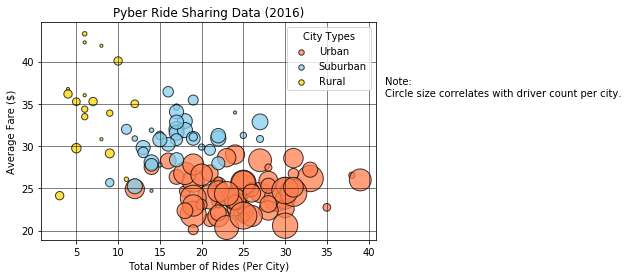

In [157]:
# Obtain the x and y coordinates for each of the three city types


urban = combinedgrouped_df.loc[combinedgrouped_df["CityType"]=="Urban"]
suburban = combinedgrouped_df.loc[combinedgrouped_df["CityType"]=="Suburban"]
rural = combinedgrouped_df.loc[combinedgrouped_df["CityType"]=="Rural"]
legend = combinedgrouped_df["CityType"].unique()

u_x_axis = urban["No_Rides"]
s_x_axis = suburban["No_Rides"]
r_x_axis = rural["No_Rides"]

u_y_axis = urban["AvgFare"]
s_y_axis = suburban["AvgFare"]
r_y_axis = rural["AvgFare"]

u_size = urban["DriverCount"]
s_size = suburban["DriverCount"]
r_size = rural["DriverCount"]

color = combinedgrouped_df["CityType"]

urban.head()

# Build the scatter plots for each city types

urbanplot = plt.scatter(u_x_axis,u_y_axis,s=u_size*10,facecolors="coral",edgecolors="black",alpha=0.75)
suburbanplot = plt.scatter(s_x_axis,s_y_axis,s=s_size*10,facecolors="skyblue",edgecolors="black",alpha=0.75)
ruralplot = plt.scatter(r_x_axis,r_y_axis,s=r_size*10,facecolors="gold",edgecolors="black",alpha=0.75)



# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(labels=legend,loc="upper right",title="City Types",markerscale=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.grid(color="black",linestyle="-",linewidth=0.5)
# Incorporate a text label regarding circle size
pltext= "Note:"+"\n"+"Circle size correlates with driver count per city."
plt.text(42, 37, pltext, horizontalalignment='left',verticalalignment='center')

# Save Figure
plt.savefig("images/bubbleplot.png",bbox_inches="tight")

## Total Fares by City Type

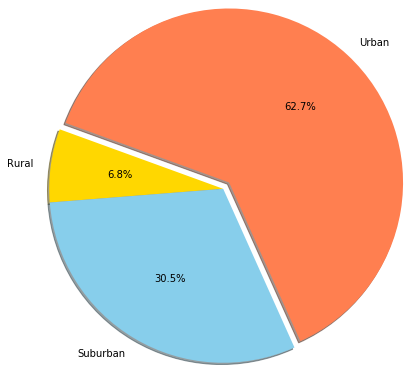

In [150]:
# Calculate Type Percents
f_groupedtype_df = cityride_df.groupby(["type"])
farecount = f_groupedtype_df["fare"].sum()

# Build Pie Chart
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban"]

plt.pie(farecount, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,radius=2)
# Save Figure
plt.savefig("images/pie_fare.png",bbox_inches="tight")

## Total Rides by City Type

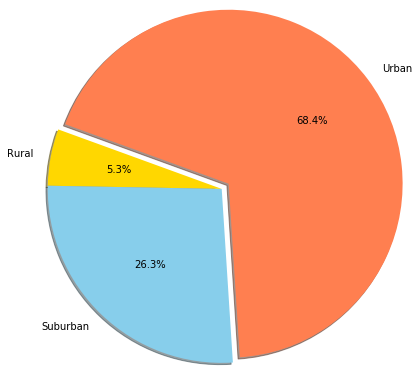

In [151]:
# Calculate Ride Percents
r_groupedtype_df = cityride_df.groupby(["type"])
ridecount = r_groupedtype_df["type"].count()
# Build Pie Chart
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban"]

plt.pie(ridecount, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,radius=2)
# Save Figure
plt.savefig("images/pie_rides.png",bbox_inches="tight")

## Total Drivers by City Type

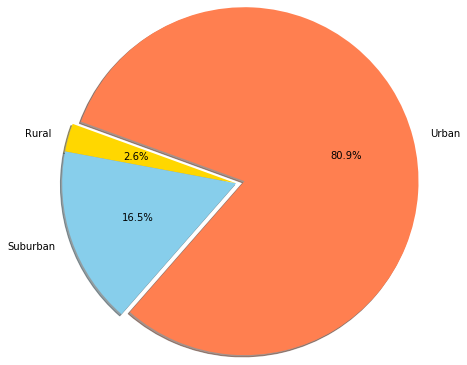

In [152]:
# Calculate Driver Percents
d_groupedtype_df = combinedgrouped_df.groupby(["CityType"])
drivercount = d_groupedtype_df["DriverCount"].sum()

# Build Pie Charts
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban"]

plt.pie(drivercount, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,radius=2)
# Save Figure
plt.savefig("images/pie_drivers.png",bbox_inches="tight")